In [115]:
import os
import pygrib
import pandas as pd
# visualization
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import pygrib

In [116]:
# original path of MRMS data
folder_path = 'your_path_to_MRMS_data/'
# List all files end with .grib2
file_list = [f for f in sorted(os.listdir(folder_path)) if f.endswith('.grib2')]

print(file_list)

['MRMS_BREF_1HR_MAX_00.50_20210101-130000.grib2', 'MRMS_EchoTop_18_00.50_20210101-130037.grib2', 'MRMS_MergedReflectivityQCComposite_00.50_20210101-130037.grib2', 'MRMS_MultiSensor_QPE_01H_Pass1_00.00_20210101-130000.grib2', 'MRMS_MultiSensor_QPE_03H_Pass1_00.00_20210101-130000.grib2', 'MRMS_MultiSensor_QPE_06H_Pass1_00.00_20210101-130000.grib2', 'MRMS_PrecipFlag_00.00_20210101-130000.grib2', 'MRMS_PrecipRate_00.00_20210101-130000.grib2', 'MRMS_RadarOnly_QPE_01H_00.00_20210101-130000.grib2', 'MRMS_RotationTrackML60min_00.50_20210101-130000.grib2', 'MRMS_SyntheticPrecipRateID_00.00_20210101-130000.grib2', 'MRMS_VIL_Density_00.50_20210101-130037.grib2', 'MRMS_WarmRainProbability_00.50_20210101-130000.grib2']


Message 1: 1:10:10 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300
-99.0 62.5


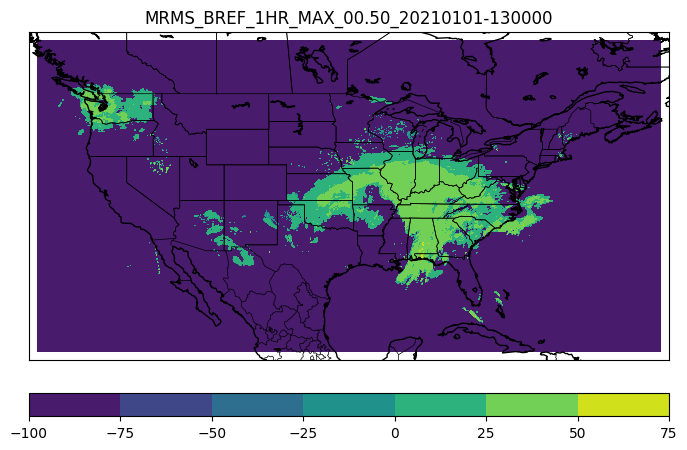

Message 1: 1:44:44 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300


ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored


-3.0 19.0


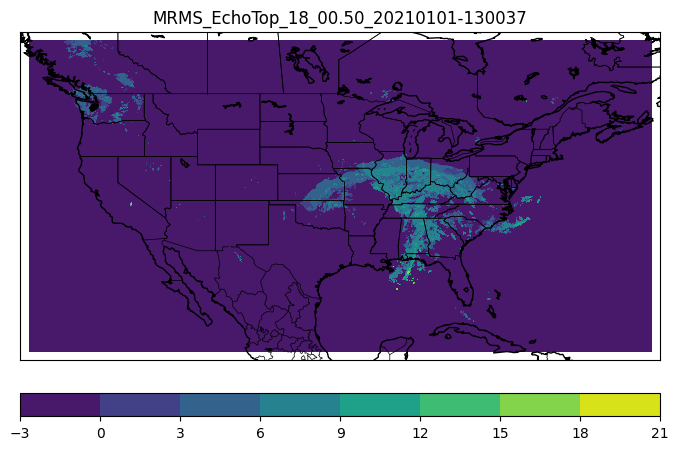

Message 1: 1:0:0 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300


ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored


-999.0 55.0


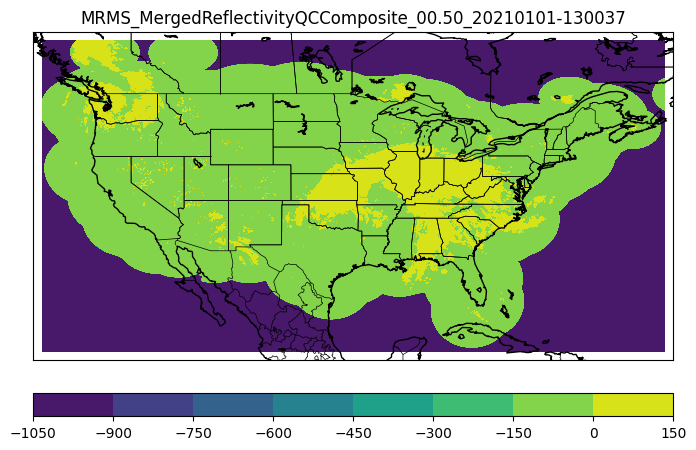

Message 1: 1:30:30 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
0.0 28.400000000000002


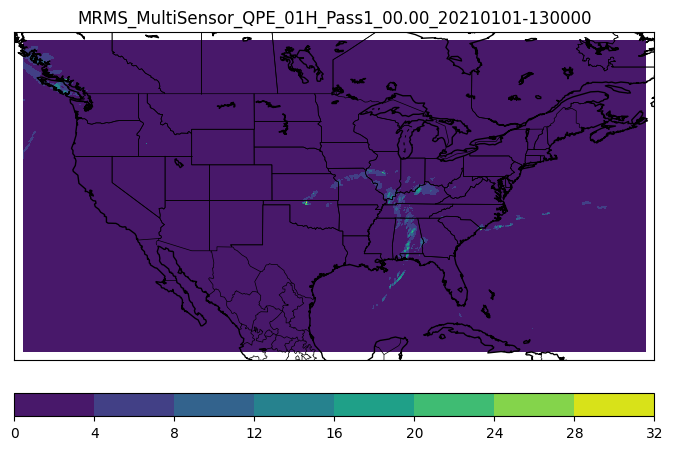

Message 1: 1:31:31 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
0.0 99.30000000000001


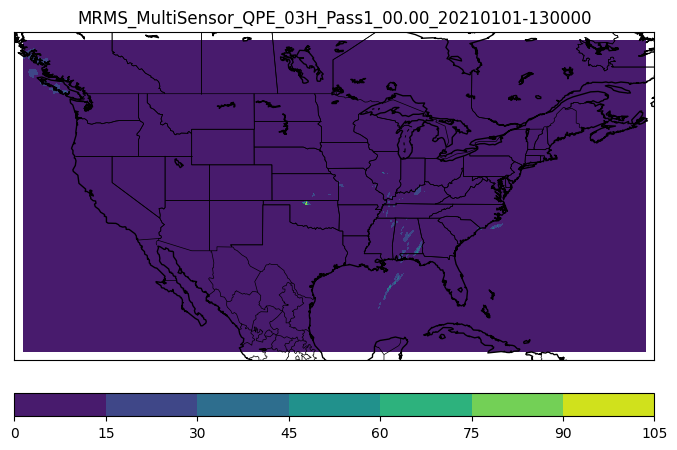

Message 1: 1:32:32 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
0.0 202.9


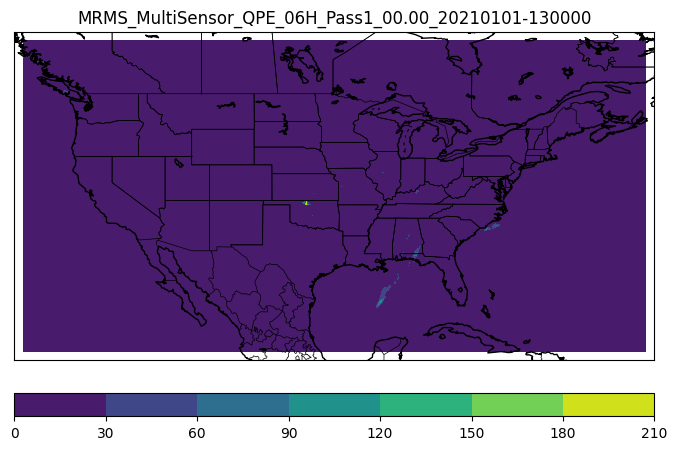

Message 1: 1:0:0 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
-3.0 10.0


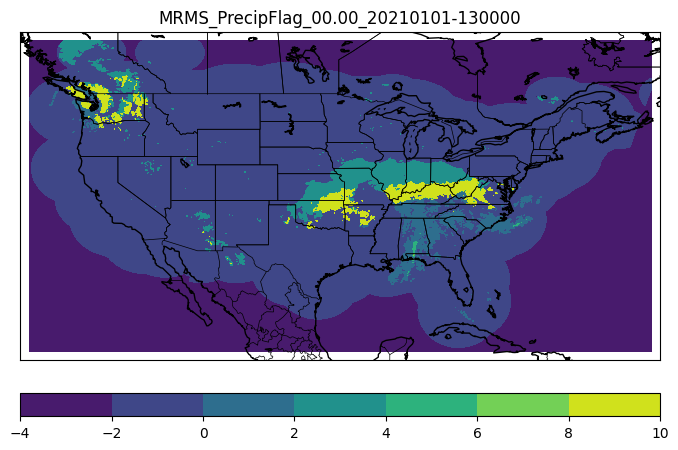

Message 1: 1:1:1 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
-3.0 154.0


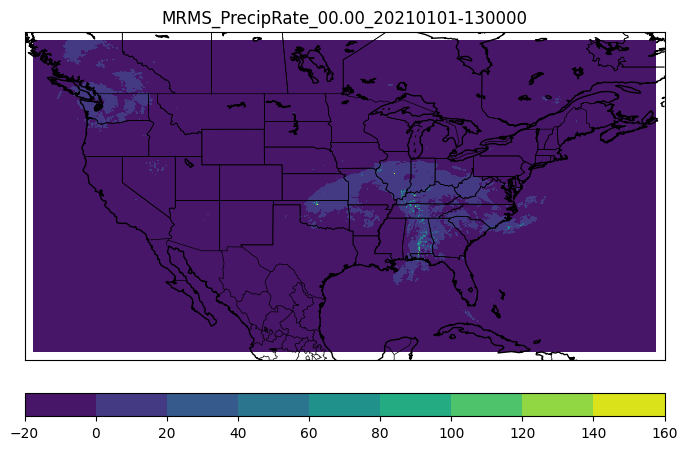

Message 1: 1:2:2 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
-3.0 59.300000000000004


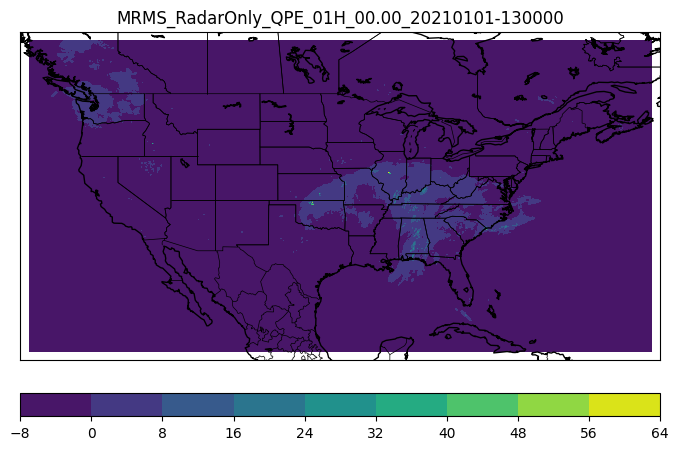

Message 1: 1:15:15 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300
-14.0 17.0


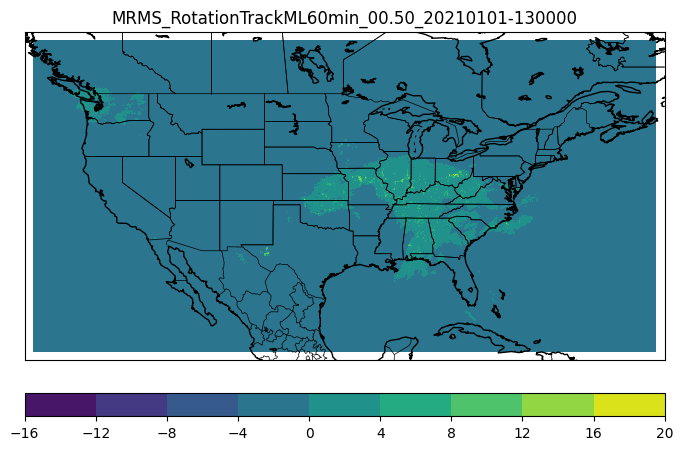

Message 1: 1:44:44 (instant):regular_ll:heightAboveSea:level 0 m:fcst time 0 mins:from 202101011300
-3.0 6.0


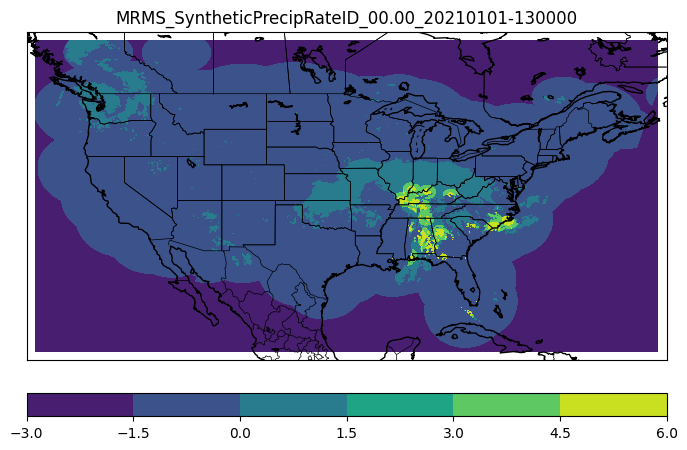

ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored


Message 1: 1:42:42 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300
-3.0 1.5


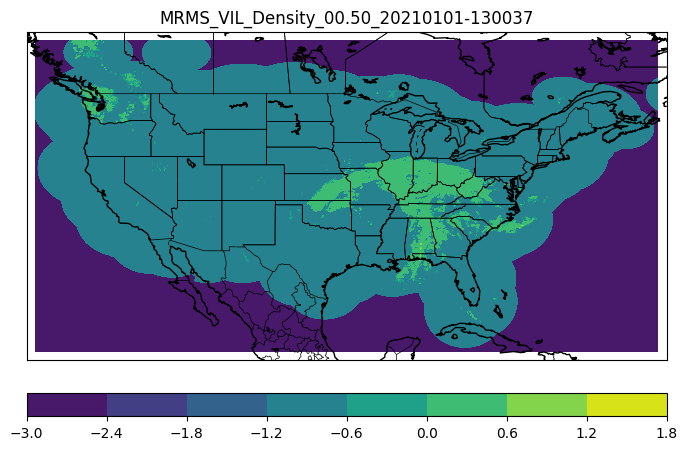

Message 1: 1:2:2 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300
-3.0 83.0


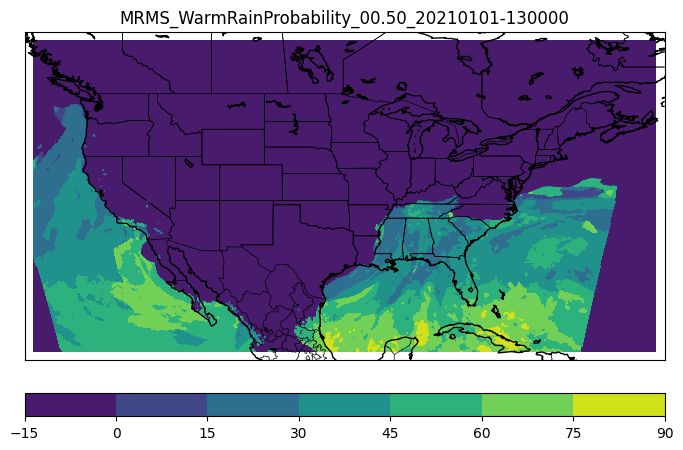

In [117]:
# iterate the file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)

    # open grbs file
    grbs = pygrib.open(file_path)
    grb = grbs[1]

    # get data and do visualization
    messages_info = grbs.messages
    for message_index in range(1, messages_info + 1):
        grb = grbs[message_index]
        print(f"Message {message_index}: {grb}")

    lats, lons = grb.latlons()
    var = grb.values

    lon2d, lat2d = np.meshgrid(lons[0, :], lats[:, 0])

    print(var.min(), var.max())

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.9])

    min_lat = np.amin(lats)
    max_lat = np.amax(lats)
    min_lon = np.amin(lons)
    max_lon = np.amax(lons)

    bm = Basemap(projection="cyl",
                 llcrnrlat=min_lat-1,
                 urcrnrlat=max_lat+1,
                 llcrnrlon=min_lon-1,
                 urcrnrlon=max_lon+1,
                 resolution='l')

    bm.drawcoastlines()
    bm.drawstates()
    bm.drawcountries()

    cf = bm.contourf(lon2d, lat2d, var)
    cb = bm.colorbar(cf, "bottom", size="7%", pad="10%")

    plt.title(file_name[:-6])
    
    plt.show()

    grbs.close()